<a href="https://colab.research.google.com/github/silvi3110/sis-252-inteligencia-artificial/blob/main/Ejercicios_Deep_Learning_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ===================
# Imports
# ===================
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report, confusion_matrix

# Reproducibilidad
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

print("TensodFlow:", tf.__version__)

TensodFlow: 2.19.0


In [2]:
# =========================
# 1) Carga del dataset MNIST
# =========================
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar valores (0-25 -> 0-1)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Aplanar imagenes (28x28 -> 784)
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# =========================
# 2) Definir la red neuronal
# =========================
model = models.Sequential([
    layers.Input(shape=(784,)),                   # 784 neuronas de entrada
    layers.Dense(128, activation='relu'),         # Capa oculta 1
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),          # Capa oculta 2
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')        # 10 neuronas (clases 0-9)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# ========================
# 3) Callbacks
# ========================
cbs = [
    callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
    callbacks.ModelCheckpoint("mnist_best.keras", monitor="val_accuracy",
                              save_best_only=True),
]

In [5]:
# =============================
# 4) Entrenamiento
# =============================
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=128,
    callbacks=cbs,
    verbose=1
)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7426 - loss: 0.8375 - val_accuracy: 0.9555 - val_loss: 0.1563
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9314 - loss: 0.2290 - val_accuracy: 0.9667 - val_loss: 0.1124
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9509 - loss: 0.1650 - val_accuracy: 0.9733 - val_loss: 0.0887
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9589 - loss: 0.1357 - val_accuracy: 0.9748 - val_loss: 0.0815
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9638 - loss: 0.1161 - val_accuracy: 0.9757 - val_loss: 0.0797
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9690 - loss: 0.1031 - val_accuracy: 0.9745 - val_loss: 0.0780
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9727 - loss: 0.0903 - val_accuracy: 0.9783 - val_loss: 0.0724
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9745 - loss: 0.0816 - val_accuracy: 0.

In [6]:
from contextlib import AsyncExitStack
# ============================
# 5) Evaluación
# ============================
y_pred = model.predict(X_test).argmax(axis=1)

print("\nMatrix de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Matrix de confusión:
 [[ 972    0    1    2    0    0    2    1    2    0]
 [   0 1121    4    0    0    0    2    1    7    0]
 [   3    1 1017    0    1    1    1    4    4    0]
 [   1    1    4  989    0    7    0    5    3    0]
 [   1    0    2    0  963    0    5    3    2    6]
 [   3    1    0    7    0  869    5    0    5    2]
 [   5    2    2    1    4    3  941    0    0    0]
 [   1    2   10    2    1    1    0 1005    1    5]
 [   5    1    4    4    3    5    0    3  947    2]
 [   4    3    0    4    8    3    0    7    4  976]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       89

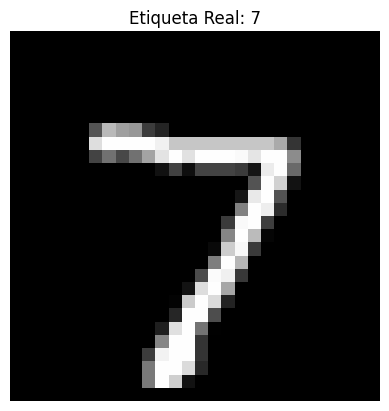

In [7]:
import matplotlib.pyplot as plt

# Seleccionar una imagen de prueba
idx = 0
sample_image = X_test[idx].reshape(28, 28)
sample_label = y_test[idx]

# Mostrar imagen
plt.imshow(sample_image, cmap="gray")
plt.title(f"Etiqueta Real: {sample_label}")
plt.axis("off")
plt.show()

In [8]:
# Preparar el dato para el modelo (reshape 1x784)
sample_input = X_test[idx].reshape(1, -1)

# Predicción
pred_proba = model.predict(sample_input)
pred_class = pred_proba.argmax(axis=1)[0]

print(f"Etiqueta real: {sample_label}")
print(f"Predicción por clase: {pred_proba}")
print(f"Predicción del modelo: {pred_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Etiqueta real: 7
Predicción por clase: [[4.7597576e-10 8.4663068e-09 2.0506941e-05 1.7092947e-05 3.9227402e-12
  4.5099430e-08 2.2194299e-12 9.9996006e-01 2.7934952e-09 2.3762152e-06]]
Predicción del modelo: 7


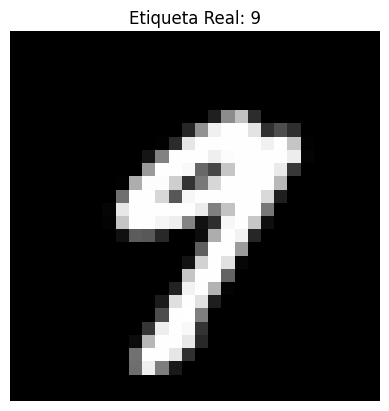

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Etiqueta real: 9
Predicción por clase: [[2.3476217e-05 1.5462942e-05 9.4882023e-07 2.3706273e-04 4.6992191e-04
  6.0316239e-04 4.6210214e-08 9.0737949e-04 1.8745230e-04 9.9755520e-01]]
Predicción del modelo: 9
------------------------------


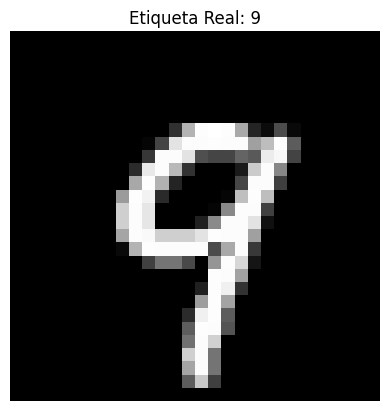

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Etiqueta real: 9
Predicción por clase: [[1.4689926e-10 4.9360991e-09 1.5118419e-09 2.8538857e-06 9.3848239e-06
  1.9024234e-06 2.7319128e-12 1.4723211e-06 2.5697270e-07 9.9998415e-01]]
Predicción del modelo: 9
------------------------------


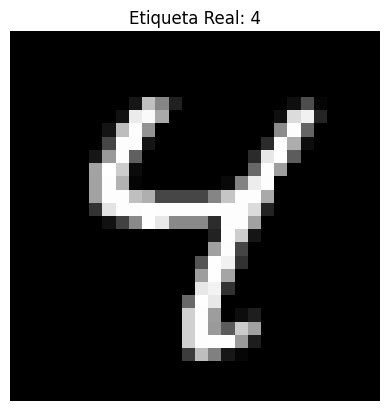

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Etiqueta real: 4
Predicción por clase: [[2.7679028e-09 1.6155441e-06 1.9246212e-08 4.0208164e-07 9.9914348e-01
  2.6189442e-05 5.4775745e-07 2.4644081e-05 2.8483744e-04 5.1812461e-04]]
Predicción del modelo: 4
------------------------------


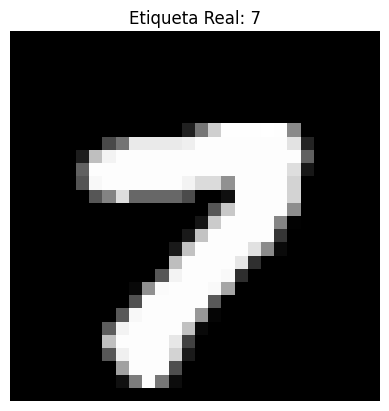

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Etiqueta real: 7
Predicción por clase: [[1.1380295e-10 2.7165599e-09 6.2316438e-05 5.5570058e-06 2.1053667e-12
  1.8951203e-08 2.9489510e-12 9.9993169e-01 6.6358744e-08 3.0774731e-07]]
Predicción del modelo: 7
------------------------------


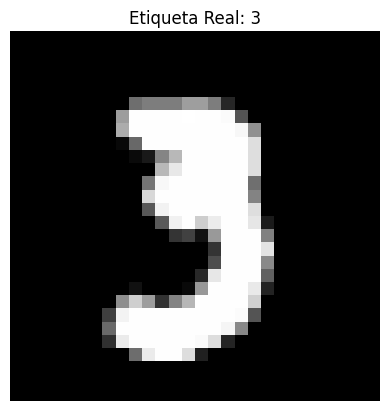

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Etiqueta real: 3
Predicción por clase: [[4.5183846e-11 3.8738257e-08 1.0074724e-08 9.9711311e-01 2.1973467e-12
  1.6944367e-03 1.1766227e-14 6.2502997e-10 2.4168293e-07 1.1922568e-03]]
Predicción del modelo: 3
------------------------------


In [9]:
import random

for _ in range(5):
    # Seleccionar una imagen de prueba con un índice random
    idx = random.randint(0, 100)  # Índice random entre 0 y 100
    sample_image = X_test[idx].reshape(28, 28)
    sample_label = y_test[idx]

    # Mostrar imagen
    plt.imshow(sample_image, cmap="gray")
    plt.title(f"Etiqueta Real: {sample_label}")
    plt.axis("off")
    plt.show()

    # Preparar el dato para el modelo (reshape 1x784)
    sample_input = X_test[idx].reshape(1, -1)

    # Predicción
    pred_proba = model.predict(sample_input)
    pred_class = pred_proba.argmax(axis=1)[0]

    print(f"Etiqueta real: {sample_label}")
    print(f"Predicción por clase: {pred_proba}")
    print(f"Predicción del modelo: {pred_class}")
    print("-" * 30) # Separador para cada iteración